## Импорт библиотек

In [1]:
pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
import pickle
import pandas as pd
import numpy as np
from livelossplot import PlotLossesKeras
from sklearn.model_selection import train_test_split
from google.colab import drive
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Загрузка данных

In [5]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
with open('/content/drive/MyDrive/kaggle/data_train', 'rb') as f:
  train_data = pickle.load(f)
with open('/content/drive/MyDrive/kaggle/data_test', 'rb') as f:
  test_data = pickle.load(f)

In [7]:
train_data_labels = train_data['labels']
train_data_labels = np.eye(10)[train_data_labels]
train_data_images = train_data['images'] / 255.0

## Разделение трейна

In [58]:
  train_images, validation_images, train_labels, validation_labels = train_test_split(train_data_images, train_data_labels, test_size=0.01)

  train = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
  validation = tf.data.Dataset.from_tensor_slices((validation_images, validation_labels))

  batch_size = 256
  train= train.shuffle(buffer_size = 1024, reshuffle_each_iteration=True)
  train = train.batch(batch_size)
  validation = validation.batch(batch_size)


Смотрим, что все классно

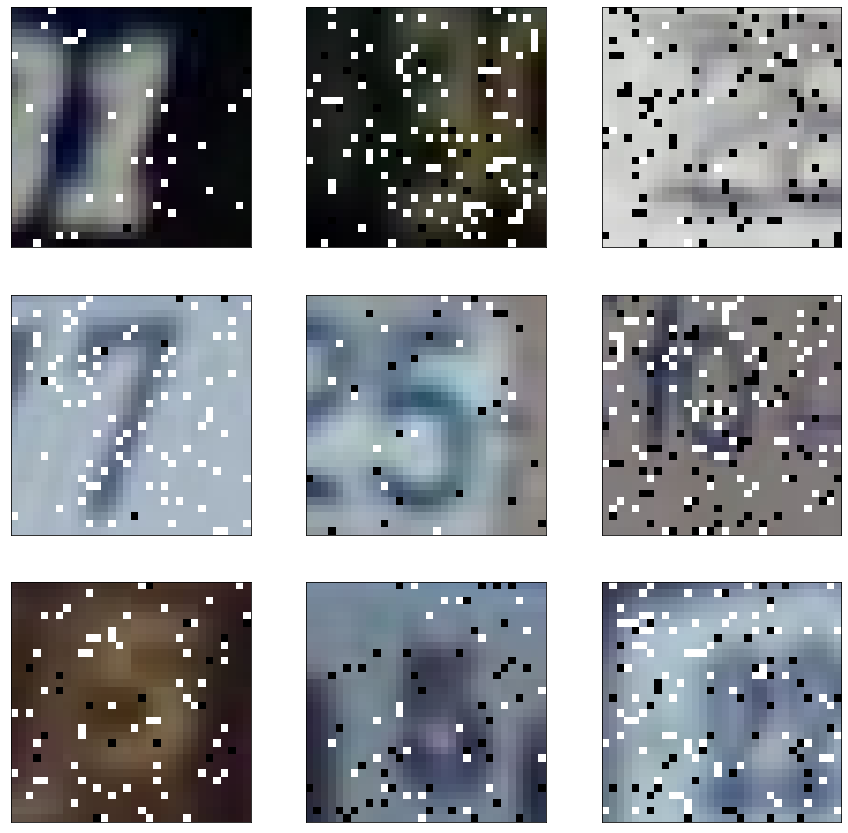

In [59]:
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data_images[i], cmap=plt.cm.binary)
plt.show()

Пишем самую простую модельку

##0

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(10)])

In [ ]:
model.compile(
    optimizer='sgd',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

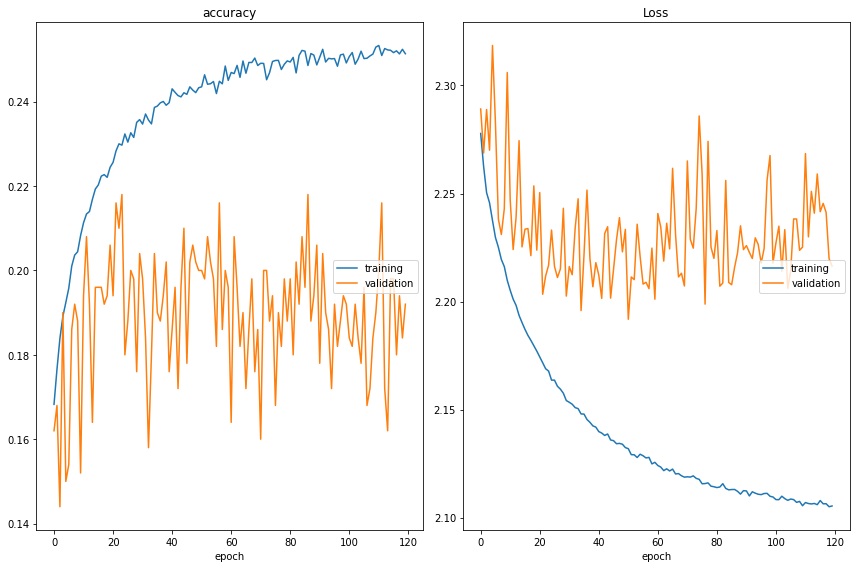

accuracy
	training         	 (min:    0.168, max:    0.253, cur:    0.251)
	validation       	 (min:    0.144, max:    0.218, cur:    0.192)
Loss
	training         	 (min:    2.105, max:    2.278, cur:    2.105)
	validation       	 (min:    2.192, max:    2.319, cur:    2.216)


In [ ]:
model.fit(train, validation_data=validation, epochs=120, 
          callbacks=[PlotLossesKeras()], verbose=False)

##1

In [ ]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=((32, 32, 3))),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(10)])


In [ ]:
model1.compile(
    optimizer='sgd',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])


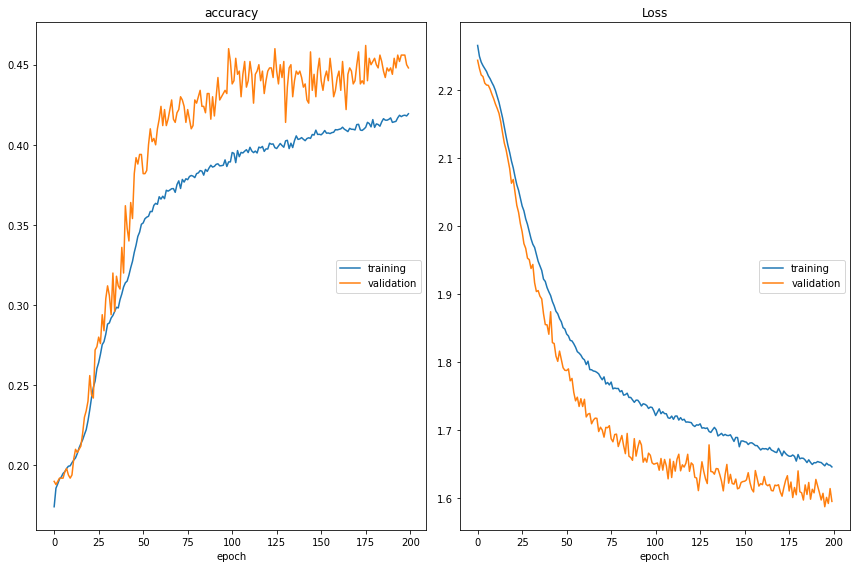

accuracy
	training         	 (min:    0.174, max:    0.419, cur:    0.419)
	validation       	 (min:    0.188, max:    0.462, cur:    0.448)
Loss
	training         	 (min:    1.646, max:    2.266, cur:    1.646)
	validation       	 (min:    1.588, max:    2.244, cur:    1.595)


In [ ]:
model1.fit(train, validation_data=validation, epochs=200, 
          callbacks=[PlotLossesKeras()], verbose=False)

##2

In [ ]:
model2 = tf.keras.Sequential([
     tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
     tf.keras.layers.Dense(128, activation='relu'),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model2.compile(
    optimizer='sgd',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])


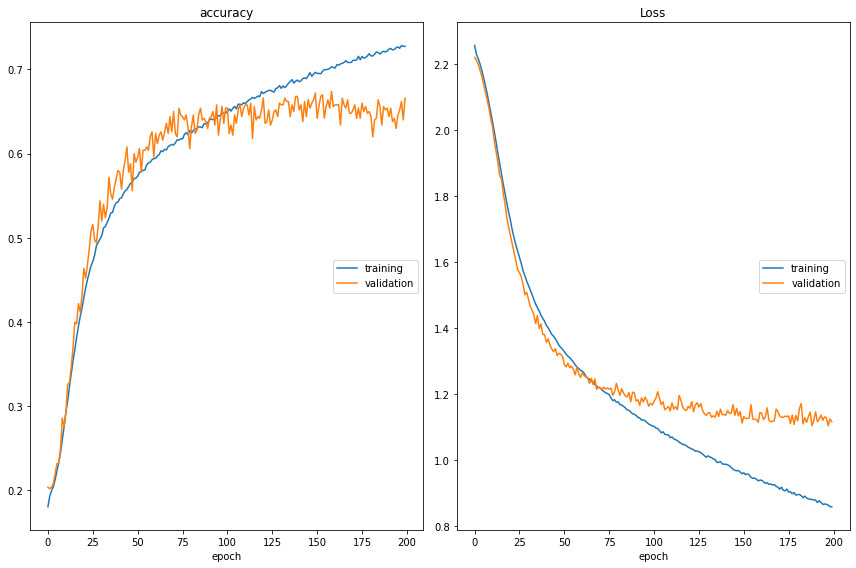

accuracy
	training         	 (min:    0.181, max:    0.729, cur:    0.727)
	validation       	 (min:    0.202, max:    0.674, cur:    0.666)
Loss
	training         	 (min:    0.860, max:    2.258, cur:    0.860)
	validation       	 (min:    1.105, max:    2.222, cur:    1.117)


In [ ]:
model2.fit(train, validation_data=validation, epochs=200, 
          callbacks=[PlotLossesKeras()], verbose=False)

##3

In [ ]:
model3 = tf.keras.Sequential([
     tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
     tf.keras.layers.Dense(128, activation='sigmoid'),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model3.compile(
    optimizer='sgd',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [ ]:
model3.fit(train, validation_data=validation, epochs=200, 
          callbacks=[PlotLossesKeras()], verbose=False)

##4


In [ ]:
model4 = tf.keras.Sequential([
     tf.keras.layers.Input(shape=(32, 32, 3)),
     tf.keras.layers.Conv2D(16, 5, activation='relu'),
     tf.keras.layers.MaxPool2D(),
     tf.keras.layers.MaxPool2D(pool_size=(3, 3)),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation='sigmoid'),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model4.compile(
    optimizer='sgd',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

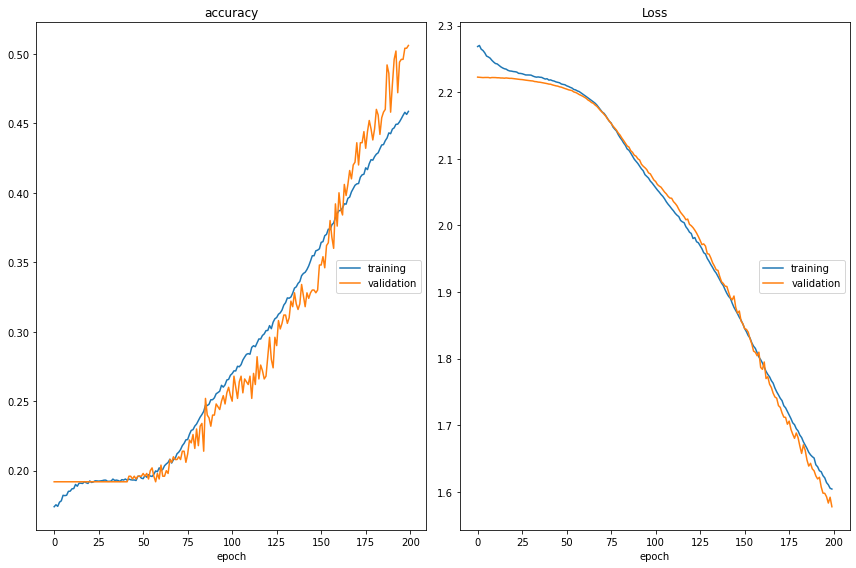

accuracy
	training         	 (min:    0.174, max:    0.459, cur:    0.459)
	validation       	 (min:    0.192, max:    0.506, cur:    0.506)
Loss
	training         	 (min:    1.604, max:    2.270, cur:    1.604)
	validation       	 (min:    1.578, max:    2.223, cur:    1.578)


In [ ]:
model4.fit(train, validation_data=validation, epochs=200, 
          callbacks=[PlotLossesKeras()], verbose=False)

##cnn_2


In [ ]:
cnn_model_2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='silu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model_2.compile(
    optimizer='sgd',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

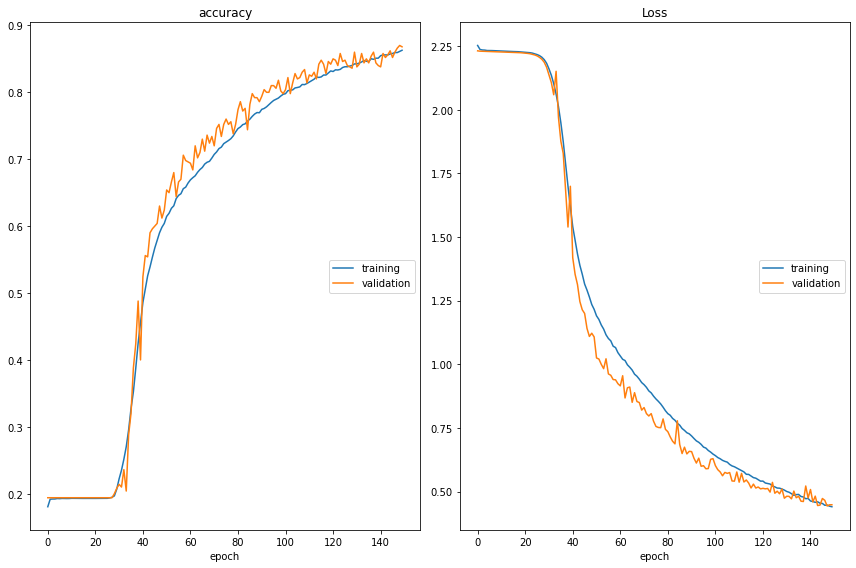

accuracy
	training         	 (min:    0.181, max:    0.863, cur:    0.863)
	validation       	 (min:    0.194, max:    0.870, cur:    0.868)
Loss
	training         	 (min:    0.440, max:    2.253, cur:    0.440)
	validation       	 (min:    0.443, max:    2.232, cur:    0.448)


In [ ]:
cnn_model_2.fit(train, validation_data=validation, epochs=150, 
          callbacks=[PlotLossesKeras()], verbose=False)

##cnn_3

In [ ]:
cnn_model_3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='silu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='silu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model_3.compile(
    optimizer='sgd',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

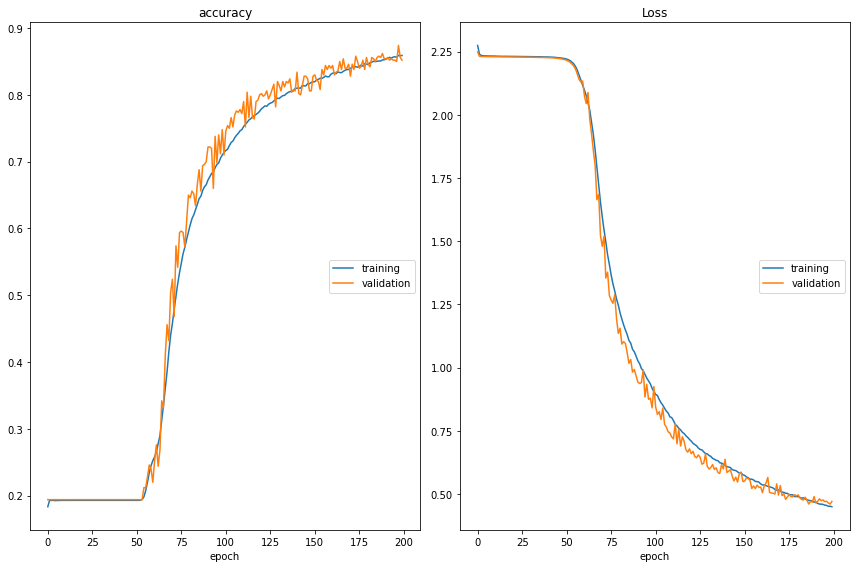

accuracy
	training         	 (min:    0.183, max:    0.859, cur:    0.859)
	validation       	 (min:    0.194, max:    0.874, cur:    0.852)
Loss
	training         	 (min:    0.450, max:    2.274, cur:    0.450)
	validation       	 (min:    0.460, max:    2.248, cur:    0.470)


In [ ]:
cnn_model_3.fit(train, validation_data=validation, epochs=200, 
          callbacks=[PlotLossesKeras()], verbose=False)

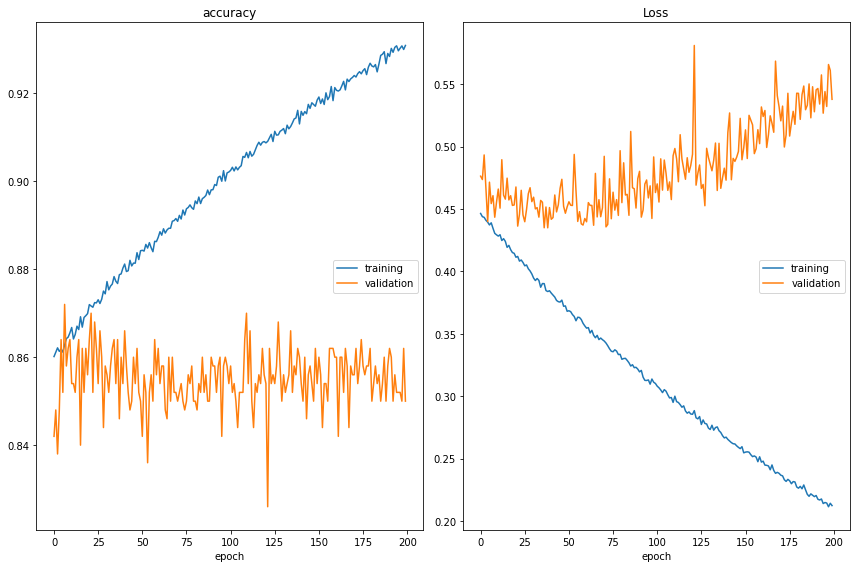

accuracy
	training         	 (min:    0.860, max:    0.931, cur:    0.931)
	validation       	 (min:    0.826, max:    0.872, cur:    0.850)
Loss
	training         	 (min:    0.211, max:    0.446, cur:    0.212)
	validation       	 (min:    0.435, max:    0.581, cur:    0.538)


In [ ]:
cnn_model_3.fit(train, validation_data=validation, epochs=200, 
          callbacks=[PlotLossesKeras()], verbose=False)

##ku

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(rotation_range=30)
data_generator.fit(train_images,
                   augment=True, rounds=2)

In [11]:
inputs = tf.keras.Input(shape=(32, 32, 3))
x = tf.keras.layers.Conv2D(32, 3, activation="relu")(inputs)
x = tf.keras.layers.Conv2D(64, 3, activation="relu")(x)
block_1 = tf.keras.layers.MaxPooling2D(3)(x)
x = tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same")(block_1)
x = tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2 = tf.keras.layers.add([x, block_1])
x = tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same")(block_2)
x = tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3 = tf.keras.layers.add([x, block_2])
x = tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same")(block_3)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
model_ku = tf.keras.Model(inputs, outputs)


model_ku.compile(
    optimizer='sgd',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

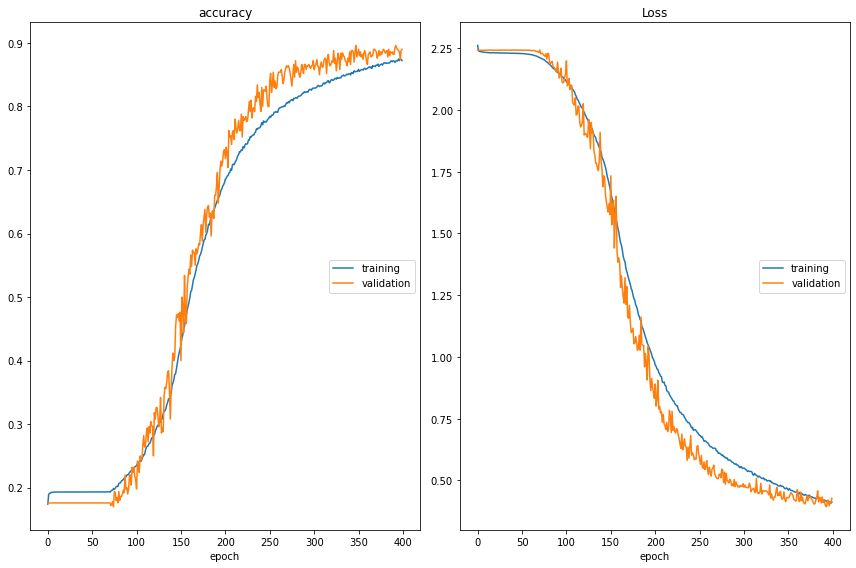

accuracy
	training         	 (min:    0.174, max:    0.875, cur:    0.872)
	validation       	 (min:    0.170, max:    0.896, cur:    0.890)
Loss
	training         	 (min:    0.408, max:    2.261, cur:    0.413)
	validation       	 (min:    0.394, max:    2.243, cur:    0.427)


In [12]:
model_ku.fit(data_generator.flow(train_images, train_labels, batch_size=256), validation_data=validation, epochs=400, 
          callbacks=[PlotLossesKeras()], verbose=False)

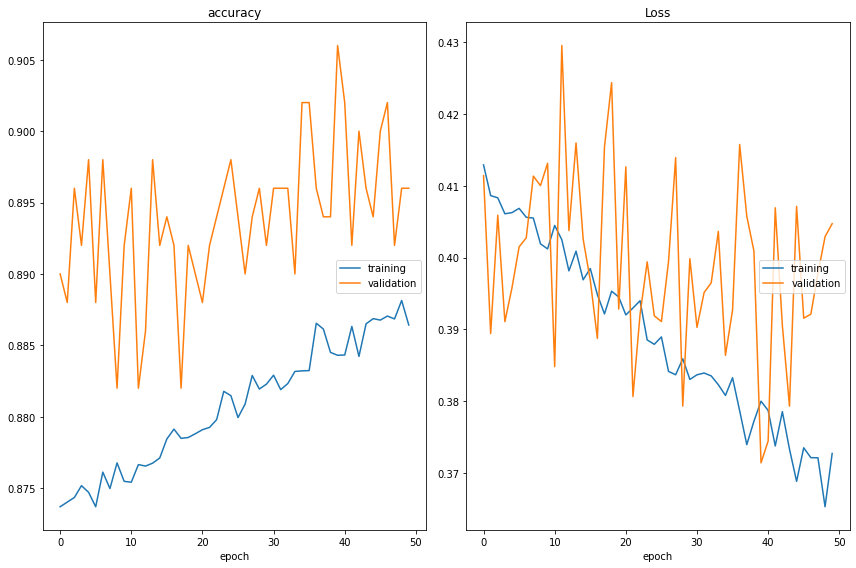

accuracy
	training         	 (min:    0.874, max:    0.888, cur:    0.886)
	validation       	 (min:    0.882, max:    0.906, cur:    0.896)
Loss
	training         	 (min:    0.365, max:    0.413, cur:    0.373)
	validation       	 (min:    0.371, max:    0.430, cur:    0.405)


In [13]:
model_ku.fit(data_generator.flow(train_images, train_labels, batch_size=256), validation_data=validation, epochs=50, 
          callbacks=[PlotLossesKeras()], verbose=False)

In [15]:
model_ku.save('model_ku')

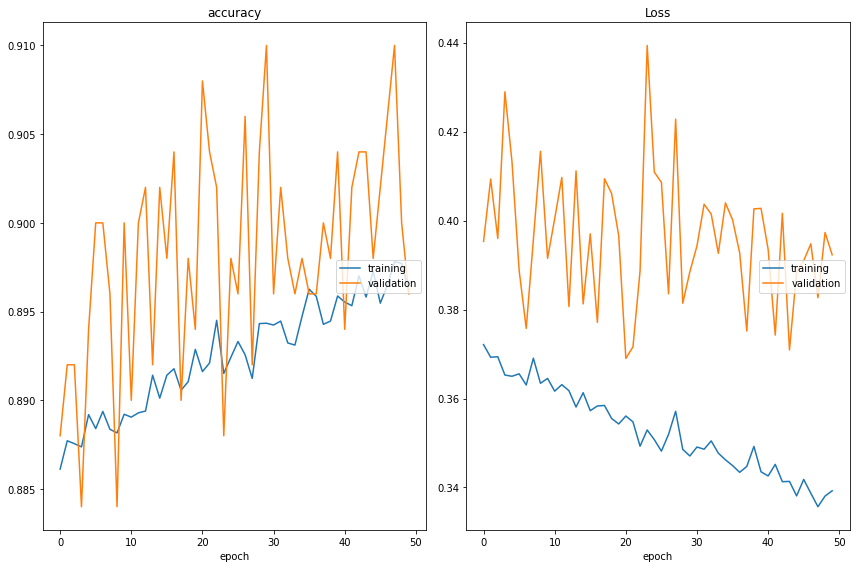

accuracy
	training         	 (min:    0.886, max:    0.898, cur:    0.896)
	validation       	 (min:    0.884, max:    0.910, cur:    0.896)
Loss
	training         	 (min:    0.336, max:    0.372, cur:    0.339)
	validation       	 (min:    0.369, max:    0.439, cur:    0.392)


In [16]:
model_ku.fit(data_generator.flow(train_images, train_labels, batch_size=256), validation_data=validation, epochs=50, 
          callbacks=[PlotLossesKeras()], verbose=False)

In [17]:
model_ku.save('model_ku_500')

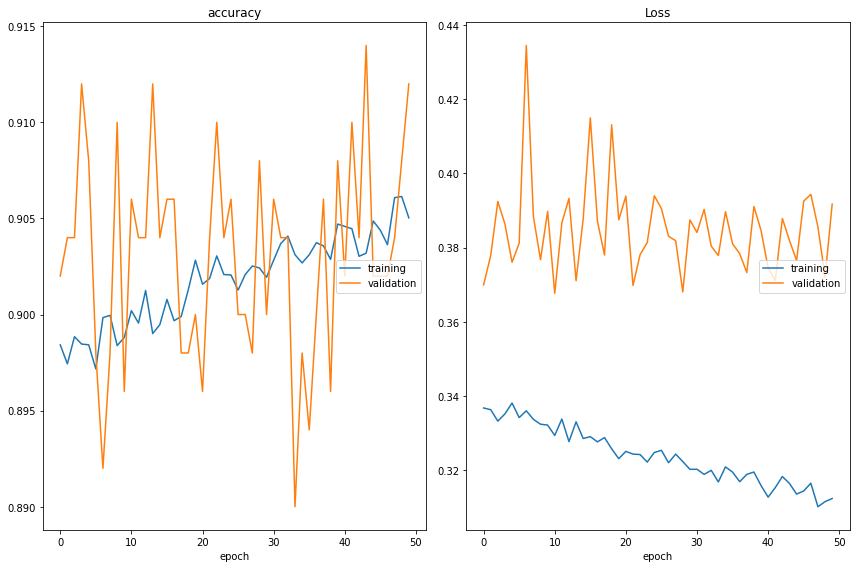

accuracy
	training         	 (min:    0.897, max:    0.906, cur:    0.905)
	validation       	 (min:    0.890, max:    0.914, cur:    0.912)
Loss
	training         	 (min:    0.310, max:    0.338, cur:    0.312)
	validation       	 (min:    0.368, max:    0.434, cur:    0.392)


In [18]:
model_ku.fit(data_generator.flow(train_images, train_labels, batch_size=256), validation_data=validation, epochs=50, 
          callbacks=[PlotLossesKeras()], verbose=False)

In [20]:
model_ku.save('model_ku_550')

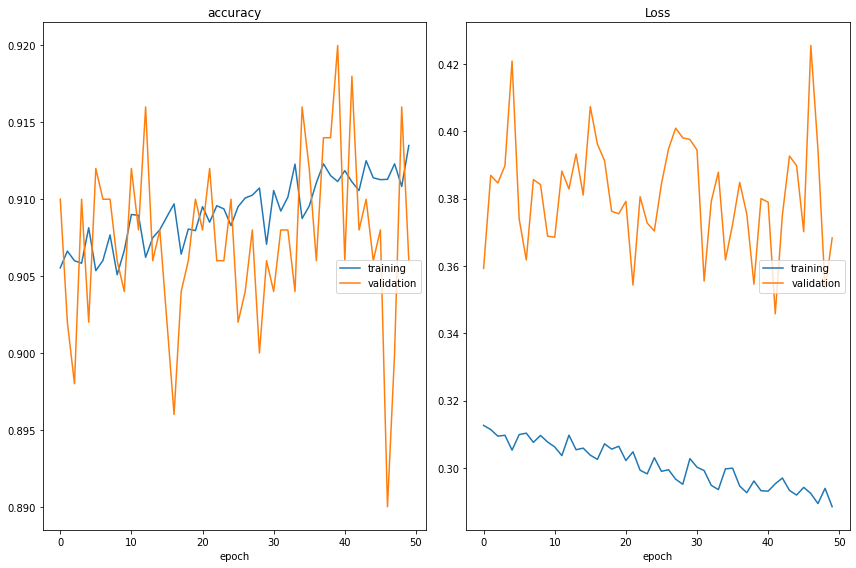

accuracy
	training         	 (min:    0.905, max:    0.913, cur:    0.913)
	validation       	 (min:    0.890, max:    0.920, cur:    0.906)
Loss
	training         	 (min:    0.288, max:    0.313, cur:    0.288)
	validation       	 (min:    0.346, max:    0.425, cur:    0.368)


In [21]:
model_ku.fit(data_generator.flow(train_images, train_labels, batch_size=256), validation_data=validation, epochs=50, 
          callbacks=[PlotLossesKeras()], verbose=False)

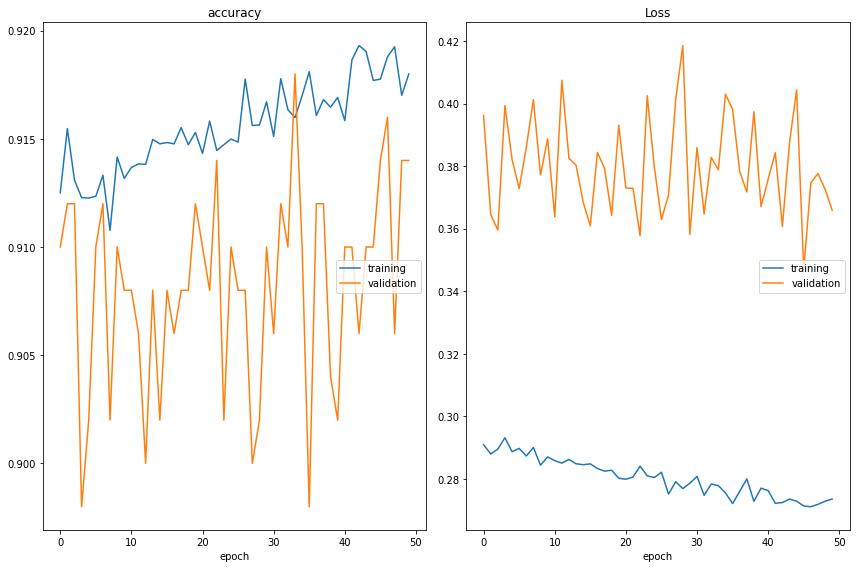

accuracy
	training         	 (min:    0.911, max:    0.919, cur:    0.918)
	validation       	 (min:    0.898, max:    0.918, cur:    0.914)
Loss
	training         	 (min:    0.271, max:    0.293, cur:    0.274)
	validation       	 (min:    0.347, max:    0.419, cur:    0.366)


In [22]:
model_ku.fit(data_generator.flow(train_images, train_labels, batch_size=256), validation_data=validation, epochs=50, 
          callbacks=[PlotLossesKeras()], verbose=False)

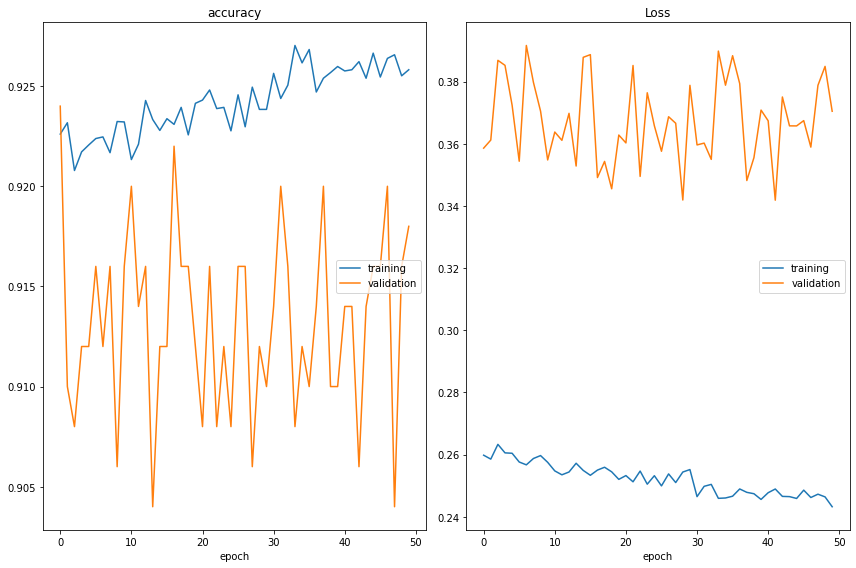

accuracy
	training         	 (min:    0.921, max:    0.927, cur:    0.926)
	validation       	 (min:    0.904, max:    0.924, cur:    0.918)
Loss
	training         	 (min:    0.243, max:    0.263, cur:    0.243)
	validation       	 (min:    0.342, max:    0.392, cur:    0.370)


In [25]:
model_ku.fit(data_generator.flow(train_images, train_labels, batch_size=256), validation_data=validation, epochs=50, 
          callbacks=[PlotLossesKeras()], verbose=False)

In [24]:
model_ku.save('model_ku_680')

##best

In [36]:
best_model = keras.models.load_model('model_ku_680')

In [ ]:
predictions = best_model.predict(test_data['images'])
prediction_df = round(pd.DataFrame(predictions))
prediction_df.to_csv('prediction.csv', index=False)

In [ ]:
pred_np = np.array(prediction_df)
pred_np = np.where(pred_np == 1)
pred_np_1 = np.moveaxis(pred_np, 0, 1)
pred_df = pd.DataFrame(pred_np_1, columns=['id', 'categories'])
pred_df

In [117]:
pred_df.to_csv('prediction1.csv', index=False)

##ku_550


In [124]:
model_shiza = keras.models.load_model('model_ku_500')

In [125]:
predictions = model_shiza.predict(test_data['images'])
prediction_df = round(pd.DataFrame(predictions))
prediction_df.to_csv('prediction.csv', index=False)

782/782 [==============================] - 2s 2ms/step


In [128]:
pred_np = np.array(prediction_df)
pred_np = np.where(pred_np == 1)
pred_np_1 = np.moveaxis(pred_np, 0, 1)
pred_df = pd.DataFrame(pred_np_1, columns=['id', 'Category'])
pred_df

,id,Category
0,0,5
1,1,4
2,2,1
3,3,1
4,4,6
...,...,...
24995,24995,1
24996,24996,1
24997,24997,0
24998,24998,9


In [129]:
pred_df.to_csv('prediction_550.csv', index=False)

##ku_1


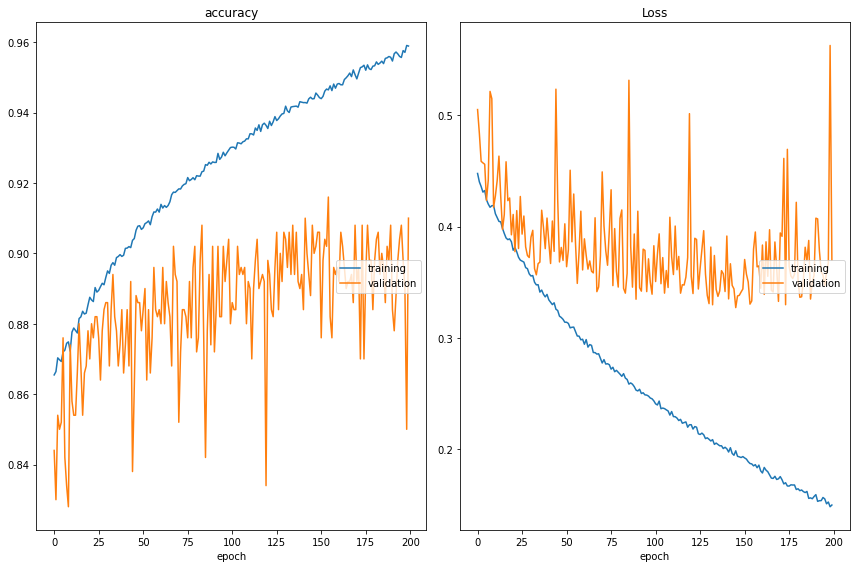

accuracy
	training         	 (min:    0.865, max:    0.959, cur:    0.959)
	validation       	 (min:    0.828, max:    0.916, cur:    0.910)
Loss
	training         	 (min:    0.148, max:    0.448, cur:    0.150)
	validation       	 (min:    0.327, max:    0.563, cur:    0.370)


In [ ]:
model_ku.fit(train, validation_data=validation, epochs=200, 
          callbacks=[PlotLossesKeras()], verbose=False)

In [ ]:
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block1 = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block1)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block2 = layers.add([x, block1])
x = layers.Conv2D(64, 3, activation="relu", padding="same")(block2)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block3 = layers.add([x, block2])
x = layers.Conv2D(64, 3, activation="relu", padding="same")(block3)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block4 = layers.add([x, block3])
block5 = layers.MaxPooling2D(2)(x)


x = layers.Conv2D(128, 3, activation="relu", padding="same")(block5)
x = layers.Conv2D(128, 3, activation="relu", padding="same")(x)
block6 = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation="relu", padding="same")(block6)
x = layers.Conv2D(128, 3, activation="relu", padding="same")(x)
block7 = layers.add([x, block6])
x = layers.Conv2D(128, 3, activation="relu", padding="same")(block7)
x = layers.Conv2D(128, 3, activation="relu", padding="same")(x)
block8 = layers.add([x, block7])
x = layers.Conv2D(128, 3, activation="relu", padding="same")(block8)
x = layers.Conv2D(128, 3, activation="relu", padding="same")(x)
block9 = layers.add([x, block8])

x = layers.Conv2D(256, 3, activation="relu", padding="same")(block9)
x = layers.Conv2D(256, 3, activation="relu", padding="same")(x)
block11 = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(256, 3, activation="relu", padding="same")(block11)
x = layers.Conv2D(256, 3, activation="relu", padding="same")(x)
block12 = layers.add([x, block11])
x = layers.Conv2D(256, 3, activation="relu", padding="same")(block12)
x = layers.Conv2D(256, 3, activation="relu", padding="same")(x)
block13 = layers.add([x, block12])
x = layers.Conv2D(256, 3, activation="relu", padding="same")(block13)
x = layers.Conv2D(256, 3, activation="relu", padding="same")(x)
block14 = layers.add([x, block13])
x = layers.Conv2D(256, 3, activation="relu", padding="same")(block14)
x = layers.Conv2D(256, 3, activation="relu", padding="same")(x)
block15 = layers.add([x, block14])
x = layers.Conv2D(256, 3, activation="relu", padding="same")(block15)
x = layers.Conv2D(256, 3, activation="relu", padding="same")(x)
block16 = layers.add([x, block15])

x = layers.Conv2D(512, 3, activation="relu", padding="same")(block16)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)
model_ku_1 = tf.keras.Model(inputs, outputs)



model_ku_1.compile(
    optimizer='sgd',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

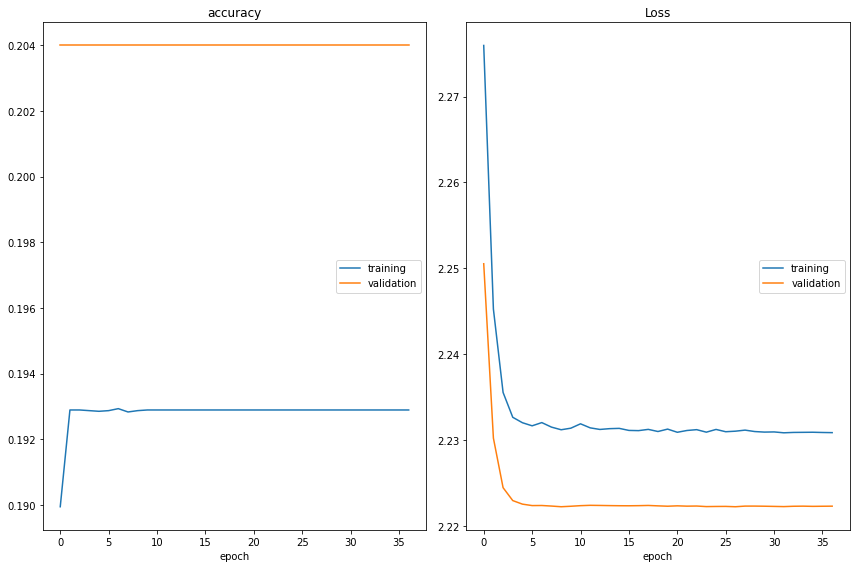

accuracy
	training         	 (min:    0.190, max:    0.193, cur:    0.193)
	validation       	 (min:    0.204, max:    0.204, cur:    0.204)
Loss
	training         	 (min:    2.231, max:    2.276, cur:    2.231)
	validation       	 (min:    2.222, max:    2.251, cur:    2.222)


In [ ]:
model_ku_1.fit(train, validation_data=validation, epochs=130, 
          callbacks=[PlotLossesKeras()], verbose=False)

##ku_2


In [ ]:
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block1 = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block1)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block2 = layers.add([x, block1])
x = layers.Conv2D(64, 3, activation="relu", padding="same")(block2)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block3 = layers.add([x, block2])
x = layers.Conv2D(64, 3, activation="relu", padding="same")(block3)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block4 = layers.add([x, block3])
block5 = layers.MaxPooling2D(2)(x)


x = layers.Conv2D(128, 3, activation="relu", padding="same")(block5)
x = layers.Conv2D(128, 3, activation="relu", padding="same")(x)
block6 = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation="relu", padding="same")(block6)
x = layers.Conv2D(128, 3, activation="relu", padding="same")(x)
block7 = layers.add([x, block6])
x = layers.Conv2D(128, 3, activation="relu", padding="same")(block7)
x = layers.Conv2D(128, 3, activation="relu", padding="same")(x)
block8 = layers.add([x, block7])
x = layers.Conv2D(128, 3, activation="relu", padding="same")(block8)
x = layers.Conv2D(128, 3, activation="relu", padding="same")(x)
block9 = layers.add([x, block8])

x = layers.Conv2D(256, 3, activation="relu", padding="same")(block9)
x = layers.Conv2D(256, 3, activation="relu", padding="same")(x)
block11 = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(256, 3, activation="relu", padding="same")(block11)
x = layers.Conv2D(256, 3, activation="relu", padding="same")(x)
block12 = layers.add([x, block11])
x = layers.Conv2D(256, 3, activation="relu", padding="same")(block12)
x = layers.Conv2D(256, 3, activation="relu", padding="same")(x)
block13 = layers.add([x, block12])
x = layers.Conv2D(256, 3, activation="relu", padding="same")(block13)
x = layers.Conv2D(256, 3, activation="relu", padding="same")(x)
block14 = layers.add([x, block13])
x = layers.Conv2D(256, 3, activation="relu", padding="same")(block14)
x = layers.Conv2D(256, 3, activation="relu", padding="same")(x)
block15 = layers.add([x, block14])
x = layers.Conv2D(256, 3, activation="relu", padding="same")(block15)
x = layers.Conv2D(256, 3, activation="relu", padding="same")(x)
block16 = layers.add([x, block15])

x = layers.Conv2D(512, 3, activation="relu", padding="same")(block16)
x = layers.Conv2D(512, 3, activation="relu", padding="same")(x)
block17 = layers.MaxPooling2D(1)(x)
x = layers.Conv2D(512, 3, activation="relu", padding="same")(block17)
x = layers.Conv2D(512, 3, activation="relu", padding="same")(x)
block18 = layers.add([x, block17])
x = layers.Conv2D(512, 3, activation="relu", padding="same")(block18)
x = layers.Conv2D(512, 3, activation="relu", padding="same")(x)
block19 = layers.add([x, block18])
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(10, activation='softmax')(x)


inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block1 = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block1)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block2 = layers.add([x, block1])
x = layers.Conv2D(64, 3, activation="relu", padding="same")(block2)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block3 = layers.add([x, block2])
x = layers.Conv2D(64, 3, activation="relu", padding="same")(block3)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block4 = layers.add([x, block3])
block5 = layers.MaxPooling2D(2)(x)


x = layers.Conv2D(128, 3, activation="relu", padding="same")(block5)
x = layers.Conv2D(128, 3, activation="relu", padding="same")(x)
block6 = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation="relu", padding="same")(block6)
x = layers.Conv2D(128, 3, activation="relu", padding="same")(x)
block7 = layers.add([x, block6])
x = layers.Conv2D(128, 3, activation="relu", padding="same")(block7)
x = layers.Conv2D(128, 3, activation="relu", padding="same")(x)
block8 = layers.add([x, block7])
x = layers.Conv2D(128, 3, activation="relu", padding="same")(block8)
x = layers.Conv2D(128, 3, activation="relu", padding="same")(x)
block9 = layers.add([x, block8])

x = layers.Conv2D(256, 3, activation="relu", padding="same")(block9)
x = layers.Conv2D(256, 3, activation="relu", padding="same")(x)
block11 = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(256, 3, activation="relu", padding="same")(block11)
x = layers.Conv2D(256, 3, activation="relu", padding="same")(x)
block12 = layers.add([x, block11])
x = layers.Conv2D(256, 3, activation="relu", padding="same")(block12)
x = layers.Conv2D(256, 3, activation="relu", padding="same")(x)
block13 = layers.add([x, block12])
x = layers.Conv2D(256, 3, activation="relu", padding="same")(block13)
x = layers.Conv2D(256, 3, activation="relu", padding="same")(x)
block14 = layers.add([x, block13])
x = layers.Conv2D(256, 3, activation="relu", padding="same")(block14)
x = layers.Conv2D(256, 3, activation="relu", padding="same")(x)
block15 = layers.add([x, block14])
x = layers.Conv2D(256, 3, activation="relu", padding="same")(block15)
x = layers.Conv2D(256, 3, activation="relu", padding="same")(x)
block16 = layers.add([x, block15])

x = layers.Conv2D(512, 3, activation="relu", padding="same")(block16)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)
model_ku_2 = tf.keras.Model(inputs, outputs)



model_ku_2.compile(
    optimizer='sgd',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

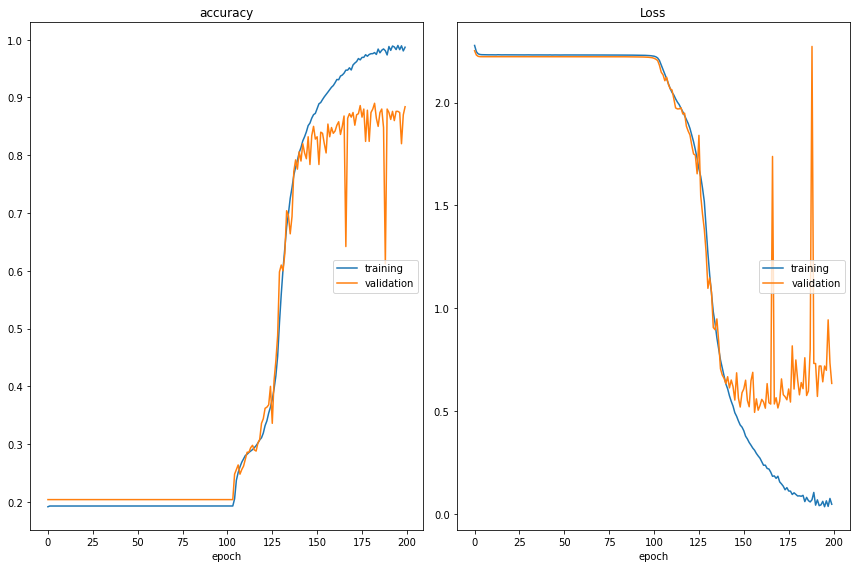

accuracy
	training         	 (min:    0.192, max:    0.990, cur:    0.987)
	validation       	 (min:    0.204, max:    0.890, cur:    0.884)
Loss
	training         	 (min:    0.037, max:    2.277, cur:    0.049)
	validation       	 (min:    0.496, max:    2.272, cur:    0.636)


In [ ]:
model_ku_2.fit(train, validation_data=validation, epochs=200, 
          callbacks=[PlotLossesKeras()], verbose=False)